# Lattice-3 Hexagonal

When we say "Lattice-3, each edge gets divided into 3. Another way of saying this is that the density is 2.
Lattice-2 would be denisty of 1.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *

## The Idea behind Lattice-3

This one was a fairly simple idea. To trisect each of the 6 edges of each hexagon in a HexGrid.
Once that was done (12 new points + the 6 vertices), connect everything using only lines parallel to the Edges.
(I have created a nice convenience method called `h.render_parallel_line()` that makes this very easy.

The only tricky part, calculate the XY coordinates of each of the intersection points. I must have a function to compute the intersection of 2 lines, but can't recall in which notebook I last used it.


## Algorithm Steps

1. Generate/compute all the lattice points
2. Store them in a suitable data structure, such that symmetrical retrieval is possible
3. Create lines, shapes (polygons) and reflect them.
4. Symmetry can be mirror, ROT180, or 6WAY


## Try it on one Hexagon

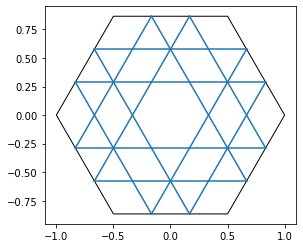

In [3]:
h = Hex()
h.render(fc='none', color='k')

for ed in range(6):
    h.render_parallel_line('e'+str(ed), 1/3)
    h.render_parallel_line('e'+str(ed), 2/3)
plt.axis('scaled');

### Let's add the 'spokes' to complete the hexagonal lattice

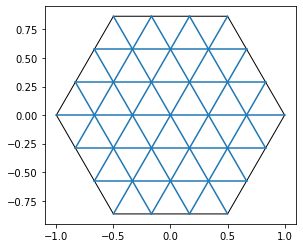

In [4]:
h = Hex()
h.render(fc='none', color='k')
h.render_spokes()
for ed in range(6):
    h.render_parallel_line('e'+str(ed), 1/3)
    h.render_parallel_line('e'+str(ed), 2/3)
plt.axis('scaled');

Notice that INSIDE each hexagon, there are 5 lines in each of the XYZ axis, for a total of 15.
- The INTERIOR points are in (3,4,5,4,3) order.
- The EXTERIOR points are 3 per edge, for a total of 18 including the vertices.

Now, in order to really use these points, we first need to compute each of their coordinates.

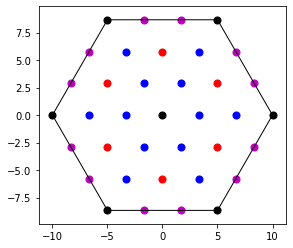

In [6]:
h = Hex(size=10)
h.render(fc='none', color='k')

h.plot_points([h.center]) # 1 point
h.plot_points(h.get_verts()) # 6 points
etp = h.point(pt_name='edge', action='trisect') # 12 points
h.plot_points(etp, color='m')
stp = h.point(pt_name='spoke', action='trisect') # 12 points
h.plot_points(stp, color='b')

# 2/3rd of the inradius distance (h/2) 
# since dist has to be in h.size, we convert absolute size to relative by dividing by h.size
atp = h.point(pt_name='apo', dist= 2 / 3 * h.ht/2 / h.size) # 6 points
h.plot_points(atp, color='r')
    
plt.axis('scaled');

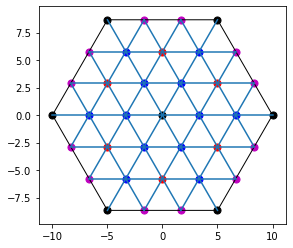

In [8]:
h = Hex(size=10)
h.render(fc='none', color='k')

h.render_spokes()
for ed in range(6):
    h.render_parallel_line('e'+str(ed), 1/3)
    h.render_parallel_line('e'+str(ed), 2/3)


h.plot_points([h.center]) # 1 point

h.plot_points(h.get_verts()) # 6 points
etp = h.point(pt_name='edge', action='trisect') # 12 points
h.plot_points(etp, color='m')
stp = h.point(pt_name='spoke', action='trisect') # 12 points
h.plot_points(stp, color='b')

# 2/3rd of the inradius distance (h/2) 
# since dist has to be in h.size, we convert absolute size to relative by dividing by h.size
atp = h.point(pt_name='apo', dist= 2 / 3 * h.ht/2 / h.size) # 6 points
h.plot_points(atp, color='r')
    
plt.axis('scaled');

# Store all the 18+18+1 points

Start with a lattice dictionary. Though other data_structs might be more suitable.

In [ ]:
def get_lattice_points(h):

    etp = h.point(pt_name='edge', action='trisect') # 12 points
    stp = h.point(pt_name='spoke', action='trisect') # 12 points
    atp = h.point(pt_name='apo', dist= 2 / 3 * h.h/2 / h.size) # 6 points

    lat = {}
    lat['c'] = h.center
    lat['v'] = h.get_verts() #6
    lat['etp1'] = etp[:6] 
    lat['etp2'] = etp[6:]
    lat['stp1'] = stp[:6] 
    lat['stp2'] = stp[6:]
    lat['atp2'] = atp

    return lat
    
    

In [ ]:
lat = get_lattice_points(h)

## 6-way symmetry

### Points

### Lines

### Shapes

(-1.2, 3.2, -0.9526279441628827, 0.9526279441628827)

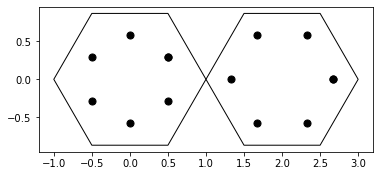

In [10]:
size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
lat0 = h0.get_lattice_points()
lat1 = h1.get_lattice_points()

h0.render(fc='none', color='k')
h0.plot_points(lat0['ab'])
h1.render(fc='none', color='k')
h1.plot_points(lat1['sb'])
plt.axis('scaled')

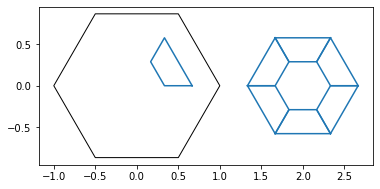

In [11]:
size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
lat0 = h0.get_lattice_points()
lat1 = h1.get_lattice_points()

h0.render(fc='none', color='k')
lat0 = h0.get_lattice_points()

h0.render_line((lat0['sb'][0], lat0['sa'][0], lat0['sa'][1],lat0['sb'][1],
                lat0['ab'][0]
               ), close=True)
#Now, let's draw the 6-way symmetrical shapes on h1
for seg in range(6):
    h1.render_line((lat1['sb'][seg], lat1['sa'][seg], lat1['sa'][seg+1],lat1['sb'][seg+1],
                    lat1['ab'][seg]
                   ), close=True)


plt.axis('scaled');


TODO

Symmetry is not that simple:
sa vs sb
ea vs eb
a2 vs..??

Move get_sym_pts to hexutils.py

- prefab doublehex, tripleHex()
-prefab hexgrids (small hexes, med, large)

#Store the lattice for all the hexagons
for h in hg.hlist:
    h.get_lattice()



0.8660254037844387

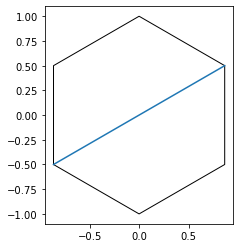

In [13]:
h = Hex(0,0,size, flat=False)
h.render(fill=None)
plt.axis('scaled')

vs = h.get_verts()
h.draw_axis('x')

vs[0][0]

(-0.3333333333333333, 2.041077998578922e-17) <class 'tuple'> 2


(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

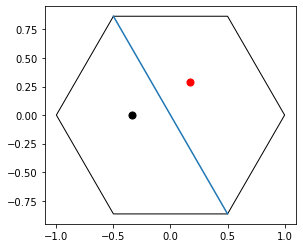

In [17]:

size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
h0.render(fc='none', color='k')

lat0 = h0.get_lattice_points()

pindex=1
pt_name = 'sa'

axi = 'y'
symp = h.get_symmetrical_points((pt_name, pindex), axi)
print(symp, type(symp), len(symp))
h0.plot_points(symp)
h0.plot_points(lat0[pt_name][pindex], color='r')
h0.draw_axis(axi)
plt.axis('scaled')

sb 0
(-0.33333333333333326, -0.5773502691896257) <class 'tuple'> 2


(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

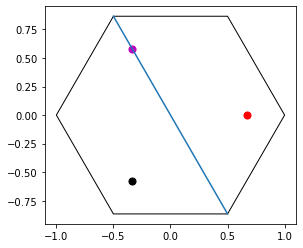

In [20]:
size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
h0.render(fc='none', color='k')

lat0 = h0.get_lattice_points()

axi = 'y'
pindex=0
pt_name = np.random.choice(['sa', 'sb', 'ea', 'eb', 'ab'])
pt_name = 'sb'
print(pt_name, pindex)
symp = h0.get_symmetrical_points((pt_name, pindex), axi)
print(symp, type(symp), len(symp))
h0.plot_points(lat0[pt_name][2], color='m')
h0.plot_points(symp)
h0.plot_points(lat0[pt_name][pindex], color='r')
h0.draw_axis(axi)
plt.axis('scaled')

In [ ]:
SPOKE_MIRROR_X = [0, 5, 4, 3, 2, 1]
SPOKE_MIRROR_Y = [4, 3, 2, 1, 0, 5]
SPOKE_MIRROR_Z = [2, 1, 0, 5, 4, 3]
APO_MIRROR_X = [5, 4, 3, 2, 1, 0]
APO_MIRROR_Y = [3, 2, 1, 0, 5, 4]
APO_MIRROR_Z = [1, 0, 5, 4, 3, 2]

#This is now part of hexagon_utilities
def _get_symmetrical_points(lat_tup, h, axis='6'):
    
    
    axis = axis.lower()
    if axis not in ['x', 'y', 'z', '6']:
        raise Error(f'faulty axis specified')
            
    pt_name, pindex = lat_tup #name and index
    
    if h.lattice is None:
        h.get_lattice_points()
    
    if axis == '6' or None:
        return h.lattice[pt_name] 
    if axis == 'x':
        if pt_name in ['sa', 'sb']:
            mirror = SPOKE_MIRROR_X
        elif pt_name in ['aa', 'ab', 'ea', 'eb']:
            mirror = APO_MIRROR_X            
    elif axis == 'y':
        if pt_name in ['sa', 'sb']:
            mirror = SPOKE_MIRROR_Y
        elif pt_name in ['aa', 'ab', 'ea', 'eb']:
            mirror = APO_MIRROR_Y            
    elif axis == 'z':
        if pt_name in ['sa', 'sb']:
            mirror = SPOKE_MIRROR_Z
        elif pt_name in ['aa', 'ab', 'ea', 'eb']:
            mirror = APO_MIRROR_Z            

    # For points on the edge, distance from vertex comes into play.
    #Adjusting for that...
    if pt_name == 'ea':
        ref_name = 'eb'
    elif pt_name == 'eb':
        ref_name = 'ea'
    else:
        ref_name = pt_name
    
    return h.lattice[ref_name][mirror[pindex]]
    

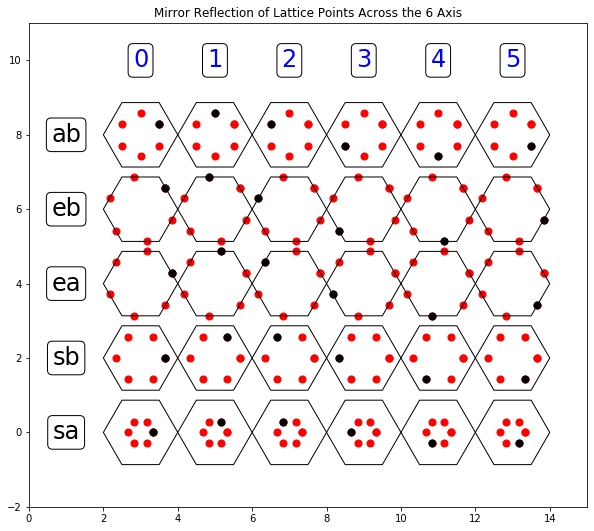

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

axi = '6'
pt_names = ['sa', 'sb', 'ea', 'eb', 'ab']

for y in range(5):
    pt_name = pt_names[y]
    plt.text(1, 2*y, pt_name, {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
    for x in range(6):
        h = Hex(3+2*x, 2*y, size=1)
        h.render(fc='none', color='k') 
        h.get_lattice_points()
        symp = h.get_symmetrical_points((pt_name, x), axi)
        h.plot_points(symp,color='r')
        h.plot_points(h.lattice[pt_name][x], color='k')

        h.draw_axis(axi)

for t in range(6):
    plt.text(3+2*t, 10, str(t), {'color': 'blue', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
        
        
plt.title(f'Mirror Reflection of Lattice Points Across the {axi} Axis')        
plt.axis('scaled')
plt.xlim(0, 15)
plt.ylim(-2, 11);


In [ ]:
def hex_cookie_cutter1(h, colors, ax, **kwargs):
    ''' This one just draws lines from fanbase to edge points'''

    if ax is None:
        ax = plt.gca()

    alle = ['e'+str(x) for x in range(6)]
    
    cfam = get_rnd_family() 
    for fan_base in ['e1', 'e3', 'e5']:    
        col_index = 0
        for ende in [e for e in alle if e!= fan_base]:
            for epts in range(2):
                start_a = epts/2
                dist = np.random.uniform(start_a, start_a+0.5)        
                col_index += 1
                color = get_rnd_color_from_family(cfam)
                h.line(start_point=fan_base, end_point=ende, start_pos='mid', end_pos=dist, lw=3,
                       color=color)
        
    return ax,


In [ ]:
fan_base = 'e4'
alle = ['e'+str(x) for x in range(6)]
[e for e in alle if e!= fan_base]


In [ ]:
def hex_cookie_cutter2(h, colors, ax, **kwargs):

    if ax is None:
        ax = plt.gca()

    fan_base = 4
    cfam = get_rnd_family() 
    
    fb = h.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

    new_pts = []
    for index in range(6):
        if index!=fan_base:
            p = h.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
            q = h.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
            new_pts.extend([p, q])

    for p in range(0, len(new_pts), 2):
        #print(new_pts[p], new_pts[p+1])
        pt_list= [new_pts[p], new_pts[p+1], fb]
        h.render_polygon(pt_list, include_center=False, ax=ax, fc = get_rnd_color_from_family(cfam))
        
    return ax,


# Fan Variations
1. Each Hex is identical
2. 1 vs 2 points in each Edge
3. Vertices form triangles, or quads
4. Smaller Polygons inside each (echo chamber)
5. Color Variations
6. Color only alternate Polygons
6. Multiple Fan origin


In [ ]:
def hex_cookie_cutter(h, color_d, dir_d, ax, **kwargs):

    if ax is None:
        ax = plt.gca()

    fan_base = dir_d['fan_base']
    
    fan_base = np.random.randint(6)    
    fb = h.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

    verts = h.get_verts()
    new_pts = {}
    for index in range(6):
        p = h.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
        q = h.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
        new_pts[index] = (verts[index], p, q)

    cfam = PURPLES_LOW_SAT
    cfam2 = GREENS_LOW_SAT
    for ky in new_pts.keys():
        if ky != fan_base:
            pt_list= [new_pts[ky][1], new_pts[ky][2], fb]     
            h.render_polygon(pt_list, include_center=False, ax=None, color=cfam[ky])
            pt_list= [verts[ky], new_pts[ky][1], fb, new_pts[(ky-1)%6][2]]     
            h.render_polygon(pt_list, include_center=False, ax=None, color=get_rnd_color_from_family(cfam2))

    #prebase traingle...
    pt_list = [new_pts[(fan_base-1)%6][2], verts[fan_base], fb]
    h.render_polygon(pt_list, include_center=False, ax=None, color=cfam[3])
    #postbase triangle
    pt_list = [new_pts[(fan_base+1)%6][1], verts[(fan_base+1)%6], fb]
    h.render_polygon(pt_list, include_center=False, ax=None, color=cfam[3])
            
    return ax,

In [ ]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    nbk = 19
    
    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = 'lightgray'
    fig.patch.set_facecolor(bg_color)

    size=2
    num_rows, num_cols = 16, 11
    
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    
    COL = PURPLES + BLUES_HIGH_SAT 
    COL = get_rnd_family() 
    #    COL = HIGH_SAT
    
    dir_d = {'fan_base':2}
    color_d = {k: get_random_color() for k in range(2)}
    color_d[0] =  'antiquewhite'
    color_d[1] = 'dodgerblue'
    color_d[2] = color_d[0]
    
    for h in hg.hlist:
        hex_cookie_cutter(h, color_d, dir_d, ax)
        h.render(fill=None, lw=1, color=bg_color, zorder=3)
    
    plt.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    
    pf.save_file(fig, 
              f'Japanese_fan_',
              nbk = nbk,
              num_rows=num_rows, 
              num_cols=num_cols
            )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()


In [ ]:
import os
os.getcwd()

In [ ]:
!dir images\\temp

In [ ]:
os.listdir('images/temp')